# Load and prepare data

In [2]:
from sklearn import  datasets
from matplotlib import pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
# split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_tr, X_ts , y_tr, y_ts = train_test_split(X, y, random_state=1,
                                          stratify=y,
                                          test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_tr)
X_std_tr = scaler.transform(X_tr)
X_std_ts = scaler.transform(X_ts)


# Tree classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier


# create a tree classifier
tree_model = DecisionTreeClassifier(criterion='gini',
                                   max_depth=3, random_state=1)
# train the model
tree_model.fit(X_std_tr, y_tr)



DecisionTreeClassifier(max_depth=3, random_state=1)

# Visualize 

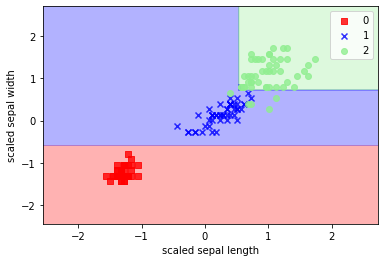

In [22]:
from plot_decision import plot_decision_regions
# combine for plotting
X_comb_std = np.vstack((X_std_tr, X_std_ts))
y_comb_std = np.hstack((y_tr, y_ts))

plot_decision_regions(X_comb_std, y_comb_std, classifier= tree_model)
plt.ylabel('scaled sepal width')
plt.xlabel('scaled sepal length')
plt.legend()
plt.show()

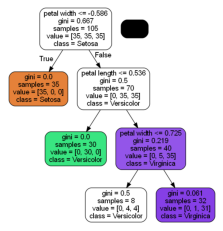

In [23]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                          filled=True,
                          rounded=True,
                          class_names=['Setosa',
                            'Versicolor',
                            'Virginica'],
                         feature_names=['petal length',
                            'petal width' ],
                            out_file=None)

graph = graph_from_dot_data(dot_data)

graph.write_png('tree.png')

plt.axis('off')
plt.imshow(plt.imread('tree.png'));


# Random Forest Classifier


In [35]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(criterion='gini', # impurity idx
                                      n_estimators=30,# n trees
                                      random_state=1,
                                      n_jobs=2 # parallelize
                                      )
Random_Forest.fit(X_tr,y_tr)

RandomForestClassifier(n_estimators=30, n_jobs=2, random_state=1)

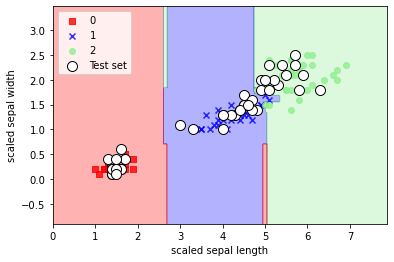

In [38]:
from plot_decision import plot_decision_regions
# combine for plotting
X_comb = np.vstack((X_tr, X_ts))
y_comb = np.hstack((y_tr, y_ts))

plot_decision_regions(X_comb, y_comb,test_idx=range(105,150), classifier= Random_Forest)
plt.ylabel('scaled sepal width')
plt.xlabel('scaled sepal length')
plt.legend()
plt.show()